<a href="https://colab.research.google.com/github/maa-atk/CNN/blob/master/cifar10rgb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
 # Single layer output required then one hot encoding done 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.datasets import cifar10

(x_train,y_train),(x_test,y_test)= cifar10.load_data()

(x_train,y_train),(x_test,y_test)= cifar10.load_data()

In [0]:
#normalize values

x_train=x_train/255
x_test=x_test/255

In [0]:
#hot encoding
from tensorflow.keras.utils import to_categorical 
y_cat_train=to_categorical(y_train,num_classes=10) 
y_cat_test=to_categorical(y_test,num_classes=10)



In [0]:
y_test[0]

array([3], dtype=uint8)

In [0]:
x_test.shape

(10000, 32, 32, 3)

In [0]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten


model=Sequential()
#convolutional layer more added since more information is transfered


model.add(
    Conv2D(
        filters=32,
        kernel_size=(4,4)
        ,strides=(1,1),
        input_shape=(32,32,3),
        activation='relu',
        ))


#pooling layer
#pool size is generaly half of kernel size
model.add(MaxPool2D(
    pool_size=(2,2)
))

model.add(
    Conv2D(
        filters=42,
        kernel_size=(4,4)
        ,strides=(1,1),
        input_shape=(32,32,3),
        activation='relu',
        ))

model.add(MaxPool2D(
    pool_size=(2,2)
))


model.add(
    Conv2D(
        filters=52,
        kernel_size=(4,4)
        ,strides=(1,1),
        input_shape=(32,32,3),
        activation='relu',
        ))
#now flaten out layers and add a dense layer

model.add(Flatten())
#ONE DENSE LAYER IN THE SAME SCALE AS 32*32*3 more neurons added
model.add(Dense(500,activation='relu'))

#final output layer
 # no of neurons = one per class for classification problem
 #softmax for multiclass problem
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy']
              )


In [0]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 11, 11, 42)        21546     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 5, 5, 42)          0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 2, 2, 52)          34996     
_________________________________________________________________
flatten_10 (Flatten)         (None, 208)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 500)             

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=1)


In [0]:
model.fit(
    x_train,
    y_cat_train,
    epochs=10,
    validation_data=(x_test,y_cat_test),
    callbacks=[early_stop]
    )

Epoch 1/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5547 - accuracy: 0.4273 - val_loss: 1.2981 - val_accuracy: 0.5306
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2161 - accuracy: 0.5670 - val_loss: 1.1429 - val_accuracy: 0.5931
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0829 - accuracy: 0.6149 - val_loss: 1.0943 - val_accuracy: 0.6113
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9926 - accuracy: 0.6471 - val_loss: 1.0739 - val_accuracy: 0.6250
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9248 - accuracy: 0.6733 - val_loss: 1.0233 - val_accuracy: 0.6481
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8676 - accuracy: 0.6918 - val_loss: 0.9837 - val_accuracy: 0.6487
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8235 - accuracy: 0.7099 - val_loss: 0.9411 - val_ac

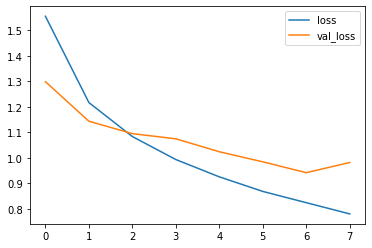

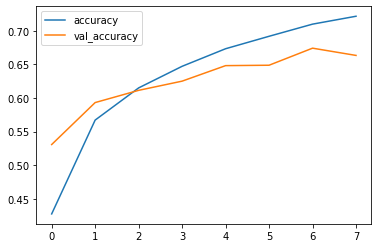

In [0]:
metrics=pd.DataFrame(model.history.history)
metrics[['loss','val_loss']].plot()

metrics[['accuracy','val_accuracy']].plot()

In [0]:
model.evaluate(x_test,y_cat_test) #last loop validation

313/313 [==============================] - 1s 4ms/step - loss: 0.9811 - accuracy: 0.6633


[0.9811445474624634, 0.6632999777793884]

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

predictions=model.predict_classes(x_test)
confusion_matrix(y_test,predictions)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1000
           1       0.74      0.87      0.80      1000
           2       0.54      0.57      0.56      1000
           3       0.43      0.51      0.47      1000
           4       0.67      0.55      0.60      1000
           5       0.48      0.66      0.55      1000
           6       0.80      0.74      0.77      1000
           7       0.79      0.68      0.73      1000
           8       0.84      0.68      0.75      1000
           9       0.85      0.68      0.76      1000

    accuracy                           0.66     10000
   macro avg       0.68      0.66      0.67     10000
weighted avg       0.68      0.66      0.67     10000



In [0]:
confusion_matrix(y_test,predictions)

array([[697,  46,  94,  43,  18,  13,   9,   5,  46,  29],
       [ 20, 871,   7,  15,   5,  16,   9,   3,  15,  39],
       [ 59,   9, 575,  89,  60, 123,  39,  30,   8,   8],
       [ 10,  12,  83, 507,  40, 267,  42,  19,  10,  10],
       [ 21,   4, 116, 112, 551,  81,  48,  53,  12,   2],
       [  9,   9,  51, 171,  35, 659,  19,  41,   3,   3],
       [  4,  10,  70,  82,  30,  57, 736,   6,   5,   0],
       [ 15,   4,  29,  70,  77, 120,   2, 675,   1,   7],
       [125,  74,  22,  44,   7,  19,   3,   5, 681,  20],
       [ 29, 138,  22,  40,   3,  22,  13,  21,  31, 681]])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


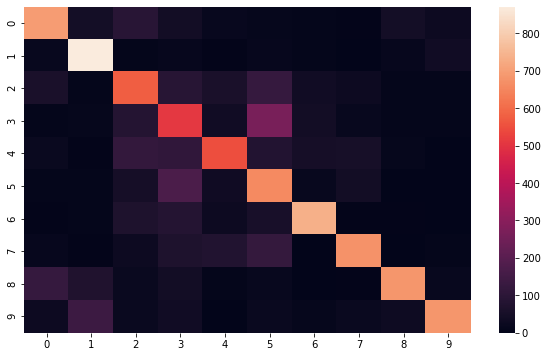

In [0]:
plt.figure(figsize=(10,6))
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,predictions))

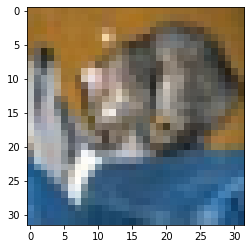

In [0]:
my_number=x_test[0]
plt.imshow(my_number)


In [0]:
model.predict_classes(my_number.reshape(1,32,32,3))

array([3])